# Analysis of feature importance 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('C:/Users/luann/Arquivos Datasets/kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Preprocessing

In [3]:
#choosing which features seems more relevant for price estimative
dataset = dataset[['bedrooms','grade','floors','bathrooms','view','sqft_living','yr_built','price']]
dataset.head()

,bedrooms,grade,floors,bathrooms,view,sqft_living,yr_built,price
0,3,7,1.0,1.00,0,1180,1955,221900.0
1,3,7,2.0,2.25,0,2570,1951,538000.0
2,2,6,1.0,1.00,0,770,1933,180000.0
3,4,7,1.0,3.00,0,1960,1965,604000.0
4,3,8,1.0,2.00,0,1680,1987,510000.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21597 non-null  int64  
 1   grade        21597 non-null  int64  
 2   floors       21597 non-null  float64
 3   bathrooms    21597 non-null  float64
 4   view         21597 non-null  int64  
 5   sqft_living  21597 non-null  int64  
 6   yr_built     21597 non-null  int64  
 7   price        21597 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [5]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Training and testing

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred = regressor.predict(x_test)

## Feature importance

In [10]:
#First, it is necessary to put coefficients of each feature in a dataframe
print(regressor.coef_)
print(regressor.intercept_)
coefficients = regressor.coef_

[-38316.98274325 124208.75399392  22566.41978024  46504.43215708
  73306.27547893    173.26061374  -3766.31988481]
6632521.386163069


In [11]:
coefficients

array([-38316.98274325, 124208.75399392,  22566.41978024,  46504.43215708,
        73306.27547893,    173.26061374,  -3766.31988481])

In [12]:
features = pd.DataFrame()

In [13]:
features['Features'] = dataset.columns[0:-1]

In [14]:
features['Coef'] = abs(coefficients)

In [15]:
features

,Features,Coef
0,bedrooms,38316.982743
1,grade,124208.753994
2,floors,22566.419780
3,bathrooms,46504.432157
4,view,73306.275479
5,sqft_living,173.260614
6,yr_built,3766.319885


In [16]:
#Now, include standard deviations
stdevs=[]
for i in dataset.columns[0:-1]:
    stdev = dataset[i].std()
    stdevs.append(stdev)

In [17]:
stdevs

[0.926298894542015,
 1.1731996637757696,
 0.5396827909775687,
 0.7689842966527002,
 0.7663898324643059,
 918.1061250800823,
 29.37523413244173]

In [18]:
features['Stdevs'] = stdevs

In [19]:
#Feature importances will be product of coefficients with standard deviations
features['Feature_Importance'] = features['Coef']*features['Stdevs']

In [20]:
features['Feature_Importance_Normalized'] = 100*features['Feature_Importance']/features['Feature_Importance'].max()

<BarContainer object of 7 artists>

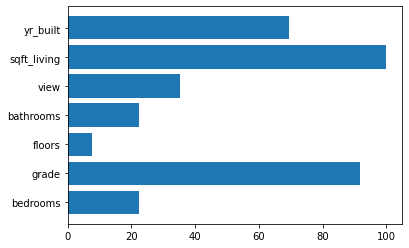

In [21]:
plt.barh(features.Features, features.Feature_Importance_Normalized)

In [22]:
features.set_index('Features')

,Coef,Stdevs,Feature_Importance,Feature_Importance_Normalized
Features,,,,
bedrooms,38316.982743,0.926299,35492.978757,22.312576
grade,124208.753994,1.173200,145721.668424,91.607578
floors,22566.419780,0.539683,12178.708409,7.656116
bathrooms,46504.432157,0.768984,35761.178054,22.481179
view,73306.275479,0.766390,56181.184183,35.318167
sqft_living,173.260614,918.106125,159071.630714,100.000000
yr_built,3766.319885,29.375234,110636.528434,69.551389


## Result

In [23]:
features = features.sort_values('Feature_Importance_Normalized',ascending=False)
print('Features by order of importance are', features['Features'].values)

Features by order of importance are ['sqft_living' 'grade' 'yr_built' 'view' 'bathrooms' 'bedrooms' 'floors']
